## INST 447
## Final Project


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

Datasets are in .csv files

In [7]:
filenames = os.listdir('./permits') # list of all files in this directory
filenames

['.DS_Store',
 'Building_Permits_in_2015.csv',
 'Building_Permits_in_2014.csv',
 'Building_Permits_in_2016.csv',
 'Building_Permits_in_2017.csv',
 'Building_Permits_in_2013.csv',
 'Building_Permits_in_2012.csv',
 'Building_Permits_in_2010.csv',
 'Building_Permits_in_2011.csv',
 'Building_Permits_in_2020.csv',
 'Building_Permits_in_2021.csv',
 'Building_Permits_in_2023.csv',
 'Building_Permits_in_2022.csv',
 'Building_Permits_in_2019.csv',
 'Building_Permits_in_2018.csv']

In [8]:
filenames = os.listdir('./census') # list of all files in this directory
filenames

['Census_Tracts_in_2020.csv', 'Census_Tracts_in_2010.csv']

In [9]:
filenames = os.listdir('./helper') # list of all files in this directory
filenames

['tract_ward_map_2020.csv', 'tract_ward_map_2010.csv']

####  Clean and prepare 2010 step by step here, 2011 through 2022 datasets are done in a loop by using a dictionary of dataframes

In [10]:
permits_df_2010 = pd.read_csv('./permits/Building_Permits_in_2010.csv',low_memory=False)
permits_df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33455 entries, 0 to 33454
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            33455 non-null  float64
 1   Y                            33455 non-null  float64
 2   OBJECTID                     33455 non-null  int64  
 3   DCRAINTERNALNUMBER           33455 non-null  int64  
 4   ISSUE_DATE                   33455 non-null  object 
 5   PERMIT_ID                    33455 non-null  object 
 6   PERMIT_TYPE_NAME             33455 non-null  object 
 7   PERMIT_SUBTYPE_NAME          32567 non-null  object 
 8   PERMIT_CATEGORY_NAME         1090 non-null   object 
 9   APPLICATION_STATUS_NAME      33455 non-null  object 
 10  FULL_ADDRESS                 33455 non-null  object 
 11  DESC_OF_WORK                 18342 non-null  object 
 12  SSL                          29831 non-null  object 
 13  ZONING          

In [11]:
#drop columns other than these
permits_df_2010 = permits_df_2010.drop(columns=permits_df_2010.columns.difference(['ISSUE_DATE','PERMIT_TYPE_NAME',
                'PERMIT_SUBTYPE_NAME','APPLICATION_STATUS_NAME','WARD','PERMIT_APPLICANT']))

In [12]:
permits_df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33455 entries, 0 to 33454
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ISSUE_DATE               33455 non-null  object
 1   PERMIT_TYPE_NAME         33455 non-null  object
 2   PERMIT_SUBTYPE_NAME      32567 non-null  object
 3   APPLICATION_STATUS_NAME  33455 non-null  object
 4   PERMIT_APPLICANT         30191 non-null  object
 5   WARD                     33455 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [52]:
permits_df_2010['ISSUE_DATE']

0        2010/05/27 12:56:42+00
1        2010/08/20 12:18:09+00
2        2010/07/07 15:50:23+00
3        2010/01/06 05:00:00+00
4        2010/01/06 05:00:00+00
                  ...          
29683    2010/06/30 04:00:00+00
29684    2010/07/27 04:00:00+00
29685    2010/11/02 04:00:00+00
29686    2010/04/22 04:00:00+00
29687    2010/04/29 04:00:00+00
Name: ISSUE_DATE, Length: 29688, dtype: object

In [53]:
#select only permit types with construction and subtype with addition and new buildiings
BM1 = permits_df_2010.PERMIT_TYPE_NAME == 'CONSTRUCTION'
BM2 = (permits_df_2010.PERMIT_SUBTYPE_NAME == 'NEW BUILDING') | (permits_df_2010.PERMIT_SUBTYPE_NAME == 'ADDITION')
permits_df_2010 = permits_df_2010[BM1 & (BM2)]
permits_df_2010.reset_index(drop=True,inplace=True)

#Convert the ISSUE_DATE column values to datetime object and keep only the year-month-day
permits_df_2010['ISSUE_DATE'] = pd.to_datetime(permits_df_2010['ISSUE_DATE'])
permits_df_2010['ISSUE_DATE'] = permits_df_2010['ISSUE_DATE'].dt.strftime('%Y-%m-%d')
permits_df_2010

,ISSUE_DATE,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,APPLICATION_STATUS_NAME,PERMIT_APPLICANT,WARD
0,2010-01-25,CONSTRUCTION,ADDITION,COMPLETED,ASHLEY POOLE,6
1,2010-02-04,CONSTRUCTION,ADDITION,COMPLETED,SANDRA JONES,8
2,2010-02-03,CONSTRUCTION,ADDITION,COMPLETED,MATTHEW J GRACE,5
3,2010-02-01,CONSTRUCTION,ADDITION,COMPLETED,CARLOS MADERO,3
4,2010-02-09,CONSTRUCTION,ADDITION,COMPLETED,TRACY HAUGEN,3
...,...,...,...,...,...,...
556,2010-08-20,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,DAVID FONTANA,8
557,2010-08-03,CONSTRUCTION,ADDITION,PERMIT ISSUED,KEN MARZULLO,4
558,2010-05-12,CONSTRUCTION,ADDITION,PERMIT ISSUED,ROBERT WALKER,1
559,2010-10-21,CONSTRUCTION,ADDITION,COMPLETED,KEVIN MILLOY,2


In [54]:
permits_df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ISSUE_DATE               561 non-null    object
 1   PERMIT_TYPE_NAME         561 non-null    object
 2   PERMIT_SUBTYPE_NAME      561 non-null    object
 3   APPLICATION_STATUS_NAME  561 non-null    object
 4   PERMIT_APPLICANT         561 non-null    object
 5   WARD                     561 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 26.4+ KB


We have some missing values in the PERMIT_APPLICANT. We use PERMIT_APPLICANT for analyzing the builders that had the most permits and construction prpojects.

Drop NaN fields

In [55]:
permits_df_2010 = permits_df_2010.dropna()
permits_df_2010 = permits_df_2010.reset_index(drop=True)
permits_df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ISSUE_DATE               561 non-null    object
 1   PERMIT_TYPE_NAME         561 non-null    object
 2   PERMIT_SUBTYPE_NAME      561 non-null    object
 3   APPLICATION_STATUS_NAME  561 non-null    object
 4   PERMIT_APPLICANT         561 non-null    object
 5   WARD                     561 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 26.4+ KB


####  Cleaning and preparing the datasets from 2010 through 2022 are done in a loop by using a dictionary of dataframes. 2010 above was for illustrating the steps but we can do this in a loop for each file rather than one by one.

In [56]:
#permit file names
permit_df_names = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

#create an empty dictionary to store permit dataframes
permit_df_dict={}

#for each file name, read the CSV file into a dataframe and put into the dictionary
for n in permit_df_names:
    permit_df_dict[n] = pd.read_csv('./permits/Building_Permits_in_'+ n + '.csv',low_memory=False)
    #drop unnecessary columns
    permit_df_dict[n] = permit_df_dict[n].drop(columns = permit_df_dict[n].columns.difference(['ISSUE_DATE','PERMIT_TYPE_NAME',
                'PERMIT_SUBTYPE_NAME','APPLICATION_STATUS_NAME','WARD','PERMIT_APPLICANT']))
    
    #Remove rows with permits other than new buildings and additions
    BM1 = permit_df_dict[n].PERMIT_TYPE_NAME == 'CONSTRUCTION'
    BM2 = (permit_df_dict[n].PERMIT_SUBTYPE_NAME == 'NEW BUILDING') | (permit_df_dict[n].PERMIT_SUBTYPE_NAME == 'ADDITION')
    permit_df_dict[n] = permit_df_dict[n][BM1 & (BM2)]
    
    #reset the index values
    permit_df_dict[n] = permit_df_dict[n].reset_index(drop=True)
    
    permit_df_dict[n] = permit_df_dict[n].dropna()
    permit_df_dict[n] = permit_df_dict[n].reset_index(drop=True)

    #Convert the issue date to datetime and keep only the year-month-day
    permit_df_dict[n]['ISSUE_DATE'] = pd.to_datetime(permit_df_dict[n]['ISSUE_DATE'])
    permit_df_dict[n]['ISSUE_DATE'] = permit_df_dict[n]['ISSUE_DATE'].dt.strftime('%Y-%m-%d')
    permit_df_dict[n]['ISSUE_DATE'] = pd.to_datetime(permit_df_dict[n]['ISSUE_DATE'])

# We have the cleaned dataframe permit_df_dict['2011'], permit_df_dict['2012'] ....permit_df_dict['2022']

In [57]:
permit_df_dict['2010'].info() # Check if there are any columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ISSUE_DATE               561 non-null    datetime64[ns]
 1   PERMIT_TYPE_NAME         561 non-null    object        
 2   PERMIT_SUBTYPE_NAME      561 non-null    object        
 3   APPLICATION_STATUS_NAME  561 non-null    object        
 4   PERMIT_APPLICANT         561 non-null    object        
 5   WARD                     561 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 26.4+ KB


### Read and prepare Census dataset 2010

In [58]:
#drop columns other than these
census_df_2010 = pd.read_csv('./census/Census_Tracts_in_2010.csv')
census_df_2010 = census_df_2010.drop(columns=census_df_2010.columns.difference(['TRACT','P0010003',
                'P0010004','P0010005','P0010006','P0010007','P0010008','P0020002','H0010001','H0010002']))
#rename columns to intuitive names
census_df_2010.columns = ['TRACT','white_pop','black_pop','ind_alk_pop','asian_pop',
                           'haw_isl_pop','other_pop','tot_hisp_pop','housing_units_total','occupied_housing_units']

In [59]:
census_df_2010

,TRACT,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,housing_units_total,occupied_housing_units
0,2102,398,3583,15,27,0,500,724,2173,1900
1,9508,257,2821,11,30,0,121,235,1742,1578
2,1200,4073,272,18,388,3,96,399,2633,2516
3,9503,432,2301,4,41,0,32,113,1256,1200
4,9501,2128,2827,36,108,10,486,831,1954,1802
...,...,...,...,...,...,...,...,...,...,...
174,9801,16,1526,3,5,0,4,26,766,677
175,9802,11,1665,1,0,0,1,27,848,677
176,9810,15,2456,3,1,0,8,22,1171,1103
177,9811,13,4246,12,4,0,18,37,1979,1819


In [60]:
census_df_2010.info() # check columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   TRACT                   179 non-null    int64
 1   white_pop               179 non-null    int64
 2   black_pop               179 non-null    int64
 3   ind_alk_pop             179 non-null    int64
 4   asian_pop               179 non-null    int64
 5   haw_isl_pop             179 non-null    int64
 6   other_pop               179 non-null    int64
 7   tot_hisp_pop            179 non-null    int64
 8   housing_units_total     179 non-null    int64
 9   occupied_housing_units  179 non-null    int64
dtypes: int64(10)
memory usage: 14.1 KB


### Read and prepare Census 20202 dataset

In [61]:
#drop columns other than these
census_df_2020 = pd.read_csv('./census/Census_Tracts_in_2020.csv')
census_df_2020 = census_df_2020.drop(columns=census_df_2020.columns.difference(['TRACT','P0010003',
                'P0010004','P0010005','P0010006','P0010007','P0010008','P0020002','H0010001','H0010002']))
#rename columns to intuitive names
census_df_2020.columns = ['TRACT','white_pop','black_pop','ind_alk_pop','asian_pop',
                           'haw_isl_pop','other_pop','tot_hisp_pop','housing_units_total','occupied_housing_units']

In [62]:
census_df_2020

,TRACT,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,housing_units_total,occupied_housing_units
0,2002,1116,1751,27,84,0,669,1022,1532,1394
1,2101,1037,2642,86,120,1,1185,1868,2335,2107
2,2102,901,2910,50,87,0,651,1074,2221,1959
3,2201,973,1722,21,94,2,326,683,1229,1141
4,2202,619,1636,48,57,3,594,1003,1454,1273
...,...,...,...,...,...,...,...,...,...,...
201,10900,74,3055,11,12,0,53,106,1378,1268
202,11001,1046,941,6,139,0,53,182,1636,1479
203,11002,1226,361,4,97,0,35,122,1471,1307
204,11100,694,4446,36,85,3,240,472,1952,1801


In [63]:
census_df_2020.info() # Check if there are any columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   TRACT                   206 non-null    int64
 1   white_pop               206 non-null    int64
 2   black_pop               206 non-null    int64
 3   ind_alk_pop             206 non-null    int64
 4   asian_pop               206 non-null    int64
 5   haw_isl_pop             206 non-null    int64
 6   other_pop               206 non-null    int64
 7   tot_hisp_pop            206 non-null    int64
 8   housing_units_total     206 non-null    int64
 9   occupied_housing_units  206 non-null    int64
dtypes: int64(10)
memory usage: 16.2 KB


#### Add Ward number to Census data. Census data has TRACT number but no ward number. In order to associate census data to permits we will use ward numbers. TRACT numbers are different for 2010 and 2020 census data. Mappings are in two files (TRACT number to WARD number) for 2010 and 2020 census data. (TRACTs are sections of Census areas and there are 179 TRACT areas in 2010 census and there are 206 TRACT areas in census 2020).

### 2010 census TRACT to WARD mapping dataset

In [64]:
tract_df_map_2010 = pd.read_csv('./helper/tract_ward_map_2010.csv')
tract_df_map_2010

,TRACT,WARD
0,902,3
1,901,3
2,1001,3
3,1100,3
4,801,3
...,...,...
174,9907,7
175,9603,7
176,7703,7
177,7708,7


In [65]:
#iterate through census datset and add ward number from the map data
for i,r in enumerate(census_df_2010.TRACT):
    for j,t in enumerate(tract_df_map_2010.TRACT):
        if r == t:
            census_df_2010.at[i,'WARD'] = tract_df_map_2010.at[j,'WARD']

#set everything to integer
census_df_2010['WARD'] = census_df_2010['WARD'].astype(np.int64)
census_df_2010['year'] = 2010 # add the year column
census_df_2010.head()

,TRACT,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,housing_units_total,occupied_housing_units,WARD,year
0,2102,398,3583,15,27,0,500,724,2173,1900,4,2010
1,9508,257,2821,11,30,0,121,235,1742,1578,5,2010
2,1200,4073,272,18,388,3,96,399,2633,2516,3,2010
3,9503,432,2301,4,41,0,32,113,1256,1200,5,2010
4,9501,2128,2827,36,108,10,486,831,1954,1802,5,2010


In [66]:
census_df_2010.info() # check if any columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   TRACT                   179 non-null    int64
 1   white_pop               179 non-null    int64
 2   black_pop               179 non-null    int64
 3   ind_alk_pop             179 non-null    int64
 4   asian_pop               179 non-null    int64
 5   haw_isl_pop             179 non-null    int64
 6   other_pop               179 non-null    int64
 7   tot_hisp_pop            179 non-null    int64
 8   housing_units_total     179 non-null    int64
 9   occupied_housing_units  179 non-null    int64
 10  WARD                    179 non-null    int64
 11  year                    179 non-null    int64
dtypes: int64(12)
memory usage: 16.9 KB


### 2020 census TRACT to WARD mapping dataset

In [67]:
tract_df_map_2020 = pd.read_csv('./helper/tract_ward_map_2020.csv')
tract_df_map_2020

,TRACT,WARD
0,1600,4
1,1500,4
2,1401,4
3,1402,4
4,1803,4
...,...,...
201,9602,7
202,9601,7
203,7809,7
204,7806,7


In [68]:
#iterate through census datset and add ward number from the map data
for i,r in enumerate(census_df_2020.TRACT):
    for j,t in enumerate(tract_df_map_2020.TRACT):
        if r == t:
            census_df_2020.at[i,'WARD'] = tract_df_map_2020.at[j,'WARD']

#set everything to integer
census_df_2020['WARD'] = census_df_2020['WARD'].astype(np.int64)
census_df_2020['year'] = 2020 # add the year column
census_df_2020.head()

,TRACT,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,housing_units_total,occupied_housing_units,WARD,year
0,2002,1116,1751,27,84,0,669,1022,1532,1394,4,2020
1,2101,1037,2642,86,120,1,1185,1868,2335,2107,4,2020
2,2102,901,2910,50,87,0,651,1074,2221,1959,4,2020
3,2201,973,1722,21,94,2,326,683,1229,1141,4,2020
4,2202,619,1636,48,57,3,594,1003,1454,1273,4,2020


In [69]:
census_df_2020.info() # check if any columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   TRACT                   206 non-null    int64
 1   white_pop               206 non-null    int64
 2   black_pop               206 non-null    int64
 3   ind_alk_pop             206 non-null    int64
 4   asian_pop               206 non-null    int64
 5   haw_isl_pop             206 non-null    int64
 6   other_pop               206 non-null    int64
 7   tot_hisp_pop            206 non-null    int64
 8   housing_units_total     206 non-null    int64
 9   occupied_housing_units  206 non-null    int64
 10  WARD                    206 non-null    int64
 11  year                    206 non-null    int64
dtypes: int64(12)
memory usage: 19.4 KB


#### Merge permit datasets from 2010 through 2022 into one dataframe

In [70]:
comb_permit_df = pd.concat([ permit_df_dict['2010'], permit_df_dict['2011'],permit_df_dict['2012'],
                             permit_df_dict['2013'], permit_df_dict['2014'],permit_df_dict['2015'],
                             permit_df_dict['2016'], permit_df_dict['2017'],permit_df_dict['2018'],
                             permit_df_dict['2019'], permit_df_dict['2020'],permit_df_dict['2021'],
                             permit_df_dict['2022'] ])
                            
                            
comb_permit_df

,ISSUE_DATE,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,APPLICATION_STATUS_NAME,PERMIT_APPLICANT,WARD
0,2010-01-25,CONSTRUCTION,ADDITION,COMPLETED,ASHLEY POOLE,6
1,2010-02-04,CONSTRUCTION,ADDITION,COMPLETED,SANDRA JONES,8
2,2010-02-03,CONSTRUCTION,ADDITION,COMPLETED,MATTHEW J GRACE,5
3,2010-02-01,CONSTRUCTION,ADDITION,COMPLETED,CARLOS MADERO,3
4,2010-02-09,CONSTRUCTION,ADDITION,COMPLETED,TRACY HAUGEN,3
...,...,...,...,...,...,...
398,2022-02-15,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,PHILLIP R. PITTINGER-DUNHAM; N,8
399,2022-03-22,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,WILL TEASS,8
400,2022-07-19,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,DFM DEVELOPMENT SERVICES LLC,3
401,2022-07-15,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,OUTERBRIDGE HORSEY; PETERSON AND COLLINS INC,3


In [71]:
comb_permit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7285 entries, 0 to 402
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ISSUE_DATE               7285 non-null   datetime64[ns]
 1   PERMIT_TYPE_NAME         7285 non-null   object        
 2   PERMIT_SUBTYPE_NAME      7285 non-null   object        
 3   APPLICATION_STATUS_NAME  7285 non-null   object        
 4   PERMIT_APPLICANT         7285 non-null   object        
 5   WARD                     7285 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 398.4+ KB


Let's add a year column to the combined table so we can create graphs based on the year

In [72]:
comb_permit_df['year'] = comb_permit_df.ISSUE_DATE.dt.year

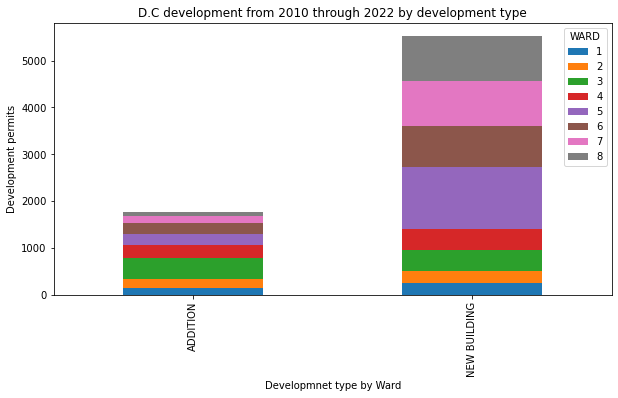

In [73]:
comb_permit_df.groupby(['PERMIT_SUBTYPE_NAME']).WARD.value_counts().unstack().plot.bar(stacked=True,figsize=(10,5))
plt.title('D.C development from 2010 through 2022 by development type')
plt.xlabel('Developmnet type by Ward')
plt.ylabel('Development permits')
plt.show()

### Analysis  
Majority of the redevelopment is new buildings. We see that Ward 5 had the most redevelopment, followed by ward 7, 8 and then 6. Redevelopment is less in wards 1,2,3 and 4.

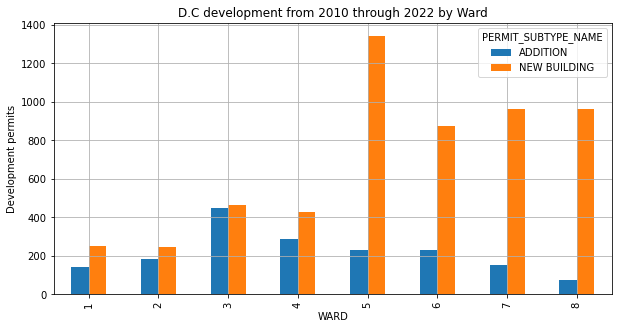

In [74]:
comb_permit_df.groupby(['WARD']).PERMIT_SUBTYPE_NAME.value_counts().unstack().plot.bar(figsize=(10,5), grid=True)
plt.title('D.C development from 2010 through 2022 by Ward')
plt.xlabel('WARD')
plt.ylabel('Development permits')
plt.show()

### Analysis  
This is another representaion of the redevelopment numbers by ward from 2010 trhrough 2022. We see highest redevelopment was in ward 5 and lowest redevelopment was in ward 1. Ward 1 has the smallest area among the wards. Ward 2 is not small but it includes most of the downtown and National mall and museums so it makes sense that it is highly built and there are less number of redevelopment.

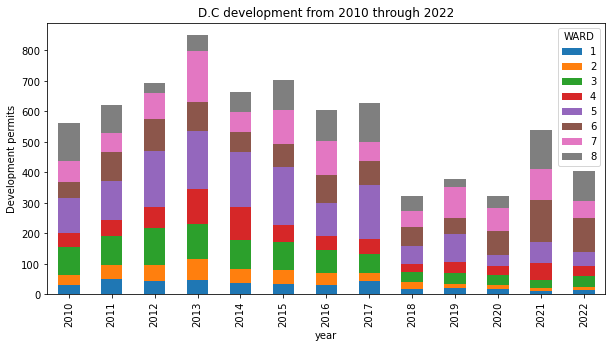

In [75]:
comb_permit_df.groupby(['year']).WARD.value_counts().unstack().plot.bar(stacked=True,figsize=(10,5))
plt.title('D.C development from 2010 through 2022')
plt.xlabel('year')
plt.ylabel('Development permits')
plt.show()

### Analysis  
We see that highest redevelopment was in 2013. Least number of redevelopment was in 2018. Ward 5 has high redevelopment especially from 2010 through 2017, but the number of redevelopments decreased for ward 5 after 2017. Wards 6,7 and 8 seems to be redevoling more starting in 2021. Ward 3 redevelopment also decreased after 2017.

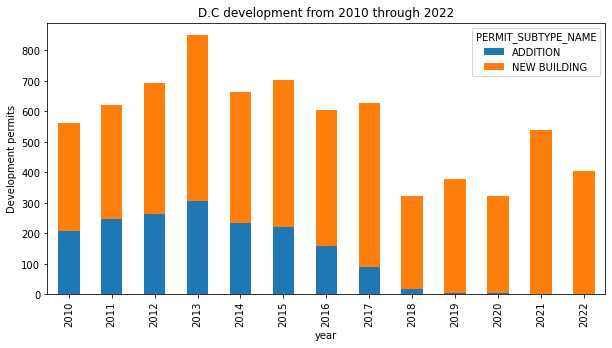

In [76]:
comb_permit_df.groupby(['year']).PERMIT_SUBTYPE_NAME.value_counts().unstack().plot.bar(stacked=True, figsize=(10,5))
plt.title('D.C development from 2010 through 2022')
plt.xlabel('year')
plt.ylabel('Development permits')
plt.show()

### Analysis  

We see that almost all the redevelopment is new buildings after 2018 rather than addition permits.

### Let's take a look at the redevelopment as a line chart to see the timeline and analyze the COVID-19 period.

In [77]:
#Group the data yearly segments
permits_yearly_df = comb_permit_df.groupby(pd.Grouper(freq='Y', key='ISSUE_DATE'))['PERMIT_SUBTYPE_NAME'].size()
permits_yearly_df

ISSUE_DATE
2010-12-31    561
2011-12-31    620
2012-12-31    692
2013-12-31    849
2014-12-31    662
2015-12-31    702
2016-12-31    605
2017-12-31    626
2018-12-31    323
2019-12-31    379
2020-12-31    324
2021-12-31    539
2022-12-31    403
Freq: A-DEC, Name: PERMIT_SUBTYPE_NAME, dtype: int64

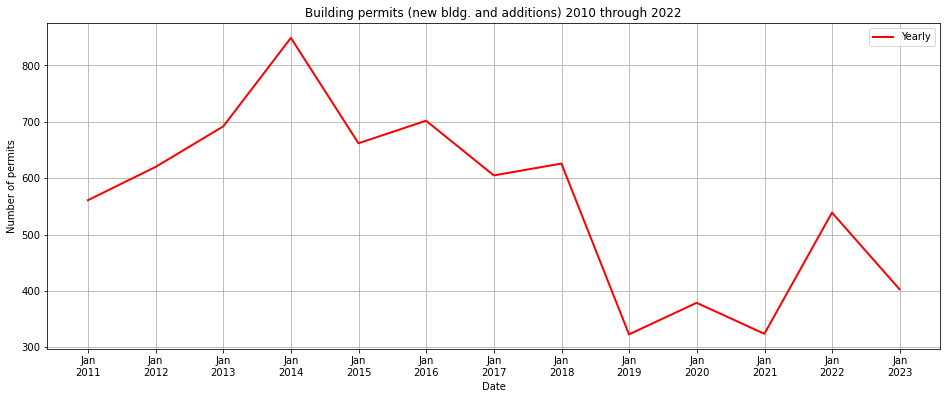

In [78]:
from matplotlib import dates as mdates

fig,ax=plt.subplots(1, 1, figsize=(16, 6))


ax.plot(permits_yearly_df.index,permits_yearly_df.values,color='red', linewidth=2, label="Yearly") 
plt.title('Building permits (new bldg. and additions) 2010 through 2022')
plt.xlabel('Date')
plt.ylabel('Number of permits')
plt.legend(loc='upper right', ncol=1)

#Add X axis labels
#Use some of the code from this site
#https://stackoverflow.com/questions/53013184/formatting-month-name-abbreviation-jan-feb-within-datetime

years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
yearsFmt = mdates.DateFormatter('%b\n%Y')
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

ax.grid()
plt.show()

### Analysis  
We see that number of new building and addition permits were down from january 2019 through January 2021. It appers that there was a decline in permits in 2018-2019 and it continued during the peak of COVID-19 pandemic. Permits started to increase starting in January 2021 but still low thorugh 2022.

### Analyze census data from 2010 and 2020

In [79]:
#Combine the census 2010 and 2020 datasets
comb_census_df = pd.concat([census_df_2010, census_df_2020])
comb_census_df

,TRACT,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,housing_units_total,occupied_housing_units,WARD,year
0,2102,398,3583,15,27,0,500,724,2173,1900,4,2010
1,9508,257,2821,11,30,0,121,235,1742,1578,5,2010
2,1200,4073,272,18,388,3,96,399,2633,2516,3,2010
3,9503,432,2301,4,41,0,32,113,1256,1200,5,2010
4,9501,2128,2827,36,108,10,486,831,1954,1802,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
201,10900,74,3055,11,12,0,53,106,1378,1268,8,2020
202,11001,1046,941,6,139,0,53,182,1636,1479,6,2020
203,11002,1226,361,4,97,0,35,122,1471,1307,6,2020
204,11100,694,4446,36,85,3,240,472,1952,1801,5,2020


In [80]:
comb_census_df.columns

Index(['TRACT', 'white_pop', 'black_pop', 'ind_alk_pop', 'asian_pop',
       'haw_isl_pop', 'other_pop', 'tot_hisp_pop', 'housing_units_total',
       'occupied_housing_units', 'WARD', 'year'],
      dtype='object')

In [81]:
#pickk the race columns and year
census_race_df = comb_census_df[['white_pop', 'black_pop', 'ind_alk_pop', 'asian_pop','haw_isl_pop', 'other_pop', 'tot_hisp_pop','year']]
census_race_df

,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,year
0,398,3583,15,27,0,500,724,2010
1,257,2821,11,30,0,121,235,2010
2,4073,272,18,388,3,96,399,2010
3,432,2301,4,41,0,32,113,2010
4,2128,2827,36,108,10,486,831,2010
...,...,...,...,...,...,...,...,...
201,74,3055,11,12,0,53,106,2020
202,1046,941,6,139,0,53,182,2020
203,1226,361,4,97,0,35,122,2020
204,694,4446,36,85,3,240,472,2020


In [82]:
census_race_df.groupby('year').sum()

,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop
year,,,,,,,
2010,231471,305125,2079,21056,302,24374,54749
2020,273194,285810,3193,33545,432,37294,77652


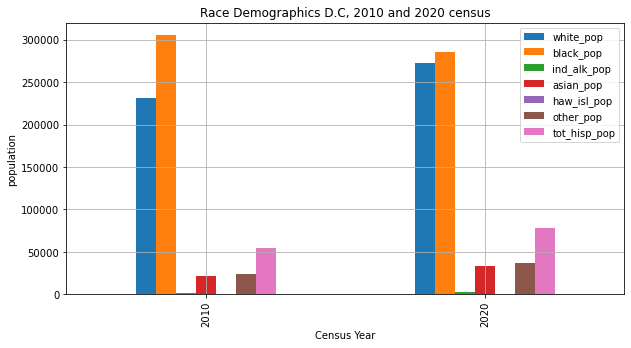

In [83]:
census_race_df.groupby('year').sum().plot.bar(figsize=(10,5), grid=True)
plt.title('Race Demographics D.C, 2010 and 2020 census')
plt.xlabel('Census Year')
plt.ylabel('population')
plt.show()

### Analysis  
Census data shows that black population decreased and white population increased from 2010 to 2020. We also see a noticiable increase in the hispanic population from 55,749 to 77,652. 

In [84]:
census_race_df = comb_census_df[['white_pop', 'black_pop', 'ind_alk_pop', 'asian_pop','haw_isl_pop', 'other_pop', 'tot_hisp_pop','WARD','year']]
census_race_df

,white_pop,black_pop,ind_alk_pop,asian_pop,haw_isl_pop,other_pop,tot_hisp_pop,WARD,year
0,398,3583,15,27,0,500,724,4,2010
1,257,2821,11,30,0,121,235,5,2010
2,4073,272,18,388,3,96,399,3,2010
3,432,2301,4,41,0,32,113,5,2010
4,2128,2827,36,108,10,486,831,5,2010
...,...,...,...,...,...,...,...,...,...
201,74,3055,11,12,0,53,106,8,2020
202,1046,941,6,139,0,53,182,6,2020
203,1226,361,4,97,0,35,122,6,2020
204,694,4446,36,85,3,240,472,5,2020


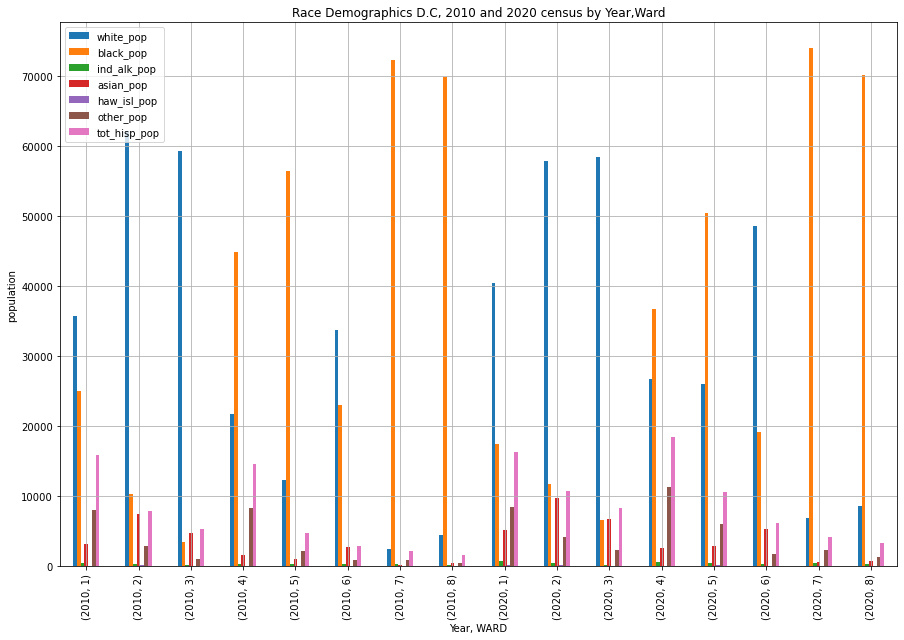

In [85]:
census_race_df.groupby(['year','WARD']).sum().plot.bar(figsize=(15,10), grid=True)
plt.title('Race Demographics D.C, 2010 and 2020 census by Year,Ward')
plt.xlabel('Year, WARD')
plt.ylabel('population')
plt.show()

### Analysis  
Ward 2 and 3 have high white population with slight decrease from 2010 to 2020. Ward 7,8 have high black pouplation and not much change from 2010 to 2020. Ward 6 shows a significant incerase in white poulation from 2010 to 2020. Ward 5 also shows a large incerase in white poulation from 2010 to 2020. Ward 2 and 3 shows an increase in hispanic population from 2010 to 2020.

## Analyze housing units using 2010 and 2020 census data

In [86]:
census_housing_df = comb_census_df[['housing_units_total','occupied_housing_units','WARD','year']]
census_housing_df

,housing_units_total,occupied_housing_units,WARD,year
0,2173,1900,4,2010
1,1742,1578,5,2010
2,2633,2516,3,2010
3,1256,1200,5,2010
4,1954,1802,5,2010
...,...,...,...,...
201,1378,1268,8,2020
202,1636,1479,6,2020
203,1471,1307,6,2020
204,1952,1801,5,2020


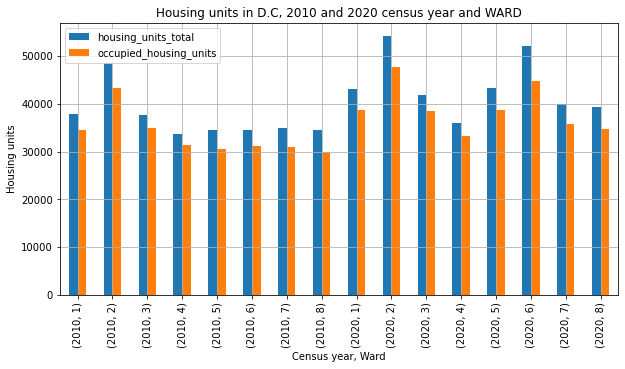

In [87]:
census_housing_df.groupby(['year','WARD']).sum().plot.bar(figsize=(10,5), grid=True)
plt.title('Housing units in D.C, 2010 and 2020 census year and WARD')
plt.xlabel('Census year, Ward')
plt.ylabel('Housing units')
plt.show()

### Analysis  
Most housing units are in Ward 2. Ward 6 shows a big increase in housing units in 2020 suggesting higher redevelopment from 2010 to 2020. There is a noticeable increase in housing units for wards 1, 5, 7 an 8. Redevelopment stayed about the same for wards 1 and 2.

In [88]:
#remove WARD column and graph housing per census years
census_housing_df = comb_census_df[['housing_units_total','occupied_housing_units','year']]
census_housing_df.groupby(['year']).sum()

,housing_units_total,occupied_housing_units
year,,
2010,296719,266707
2020,350364,312448


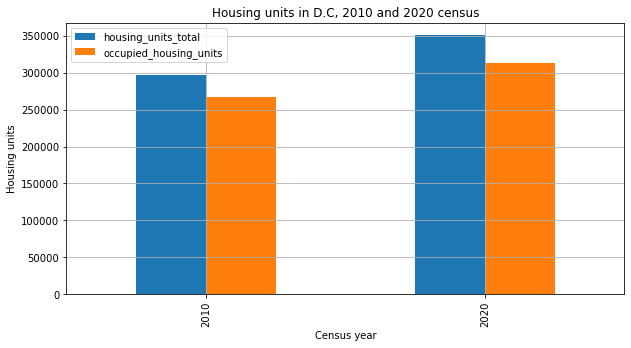

In [89]:
census_housing_df.groupby(['year']).sum().plot.bar(figsize=(10,5), grid=True)
plt.title('Housing units in D.C, 2010 and 2020 census')
plt.xlabel('Census year')
plt.ylabel('Housing units')
plt.show()

### Analysis  
Occupied housing units increased about 46 thousand units from 2010 to 2020

### Analyze the builders that has the most new development permits

In [90]:
# Create a new datafrome with the permit applicants that has the following terms in their names
# These are the companies rather than individual permit applicants
builder_df = comb_permit_df.copy()
search_terms=['LLC', 'GROUP','INC','COMPANY','COOPERATIVE']
builder_df = builder_df[builder_df.PERMIT_APPLICANT.str.contains('|'.join(search_terms))]
builder_df = builder_df.reset_index(drop=True)

#Truncate permit applicant names to only first 25 chracters
for i,n in enumerate(builder_df.PERMIT_APPLICANT):
    builder_df.at[i,'PERMIT_APPLICANT'] = n[:25]
builder_df

,ISSUE_DATE,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,APPLICATION_STATUS_NAME,PERMIT_APPLICANT,WARD,year
0,2010-12-28,CONSTRUCTION,ADDITION,COMPLETED,CITY ENGINEERS INC.,6,2010
1,2010-01-19,CONSTRUCTION,ADDITION,PERMIT ISSUED,THUY LEE; FORT LINCOLN-P,5,2010
2,2010-12-23,CONSTRUCTION,ADDITION,PERMIT ISSUED,MAX CHAIKIN 5213 B STREE,7,2010
3,2010-09-20,CONSTRUCTION,NEW BUILDING,COMPLETED,SPORTS ZONE INC SPORTS Z,1,2010
4,2010-04-15,CONSTRUCTION,NEW BUILDING,COMPLETED,BROOKLAND ART SPACE LOFTS,5,2010
...,...,...,...,...,...,...,...
1161,2022-05-10,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,WILL TEASS; OX BUILDERS,6,2022
1162,2022-01-04,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,KIM MITCHELL; MARLBORO C,6,2022
1163,2022-01-07,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,HALIL ATES; DILA DEVELOP,6,2022
1164,2022-07-19,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,DFM DEVELOPMENT SERVICES,3,2022


In [91]:
#Filter the builders/permit applicants that has more than 5 building permits from 2010 to 2022
builder_counts = builder_df.PERMIT_APPLICANT.value_counts()
big_builder_df = builder_df.loc[builder_df['PERMIT_APPLICANT'].isin(builder_counts.index[builder_counts >5]) ]
big_builder_df = big_builder_df.reset_index(drop=True) #reset the index
big_builder_df

,ISSUE_DATE,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,APPLICATION_STATUS_NAME,PERMIT_APPLICANT,WARD,year
0,2012-06-27,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,FORT LINCOLN-GATEWAY VILL,5,2012
1,2012-06-27,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,FORT LINCOLN-GATEWAY VILL,5,2012
2,2012-06-27,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,FORT LINCOLN-GATEWAY VILL,5,2012
3,2012-06-27,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,FORT LINCOLN-GATEWAY VILL,5,2012
4,2012-06-27,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,FORT LINCOLN-GATEWAY VILL,5,2012
...,...,...,...,...,...,...,...
474,2022-10-31,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,DAVID T FONTANA; NVR INC,6,2022
475,2022-10-12,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,IAN AND LEON COMMUN-ET L,7,2022
476,2022-10-12,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,DFM DEVELOPMENT SERVICES,1,2022
477,2022-01-07,CONSTRUCTION,NEW BUILDING,PERMIT ISSUED,HALIL ATES; DILA DEVELOP,6,2022


In [92]:
#list of builders with the highest permit applications from 2010 t0 2020 (permits more 5 permits)
big_builder_df.groupby(['PERMIT_APPLICANT']).size().sort_values(ascending=False)

PERMIT_APPLICANT
DFM DEVELOPMENT  SERVICES    227
FORT LINCOLN-GATEWAY VILL     46
KIM MITCHELL  CDKM CONSUL     39
FORT TOTTEN SOUTH LLC         28
DON LEE  STANTON VIEW DEV     16
COMSTOCK SIXTH STREET LLC     16
DIX STREET COOR  REVITALI     15
TAHER-  DISTRICT-PROPERTI     13
BUCHANAN  HOMES ONE, LLC;      9
PHILLIP R. PITTINGER-DUNH      9
DAVID T FONTANA; NVR INC       8
JEFFREY OWENS TECHNOLOGIE      8
HALIL  ATES; DILA DEVELOP      7
IAN AND LEON  COMMUN-ET L      7
BASS PLACE LLC                 7
GERALD  ROPER; ERB PROPER      6
JANICE MILLAR MARUT; C2 C      6
CARLOS R. IGLES  BELLO, B      6
MADDOX ENGINEERS & SURVEY      6
dtype: int64

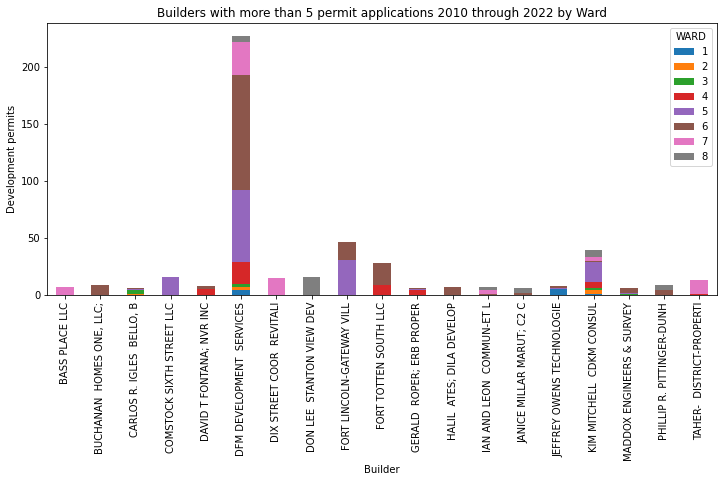

In [93]:
# Group by the builders and by wards
big_builder_df.groupby(['PERMIT_APPLICANT']).WARD.value_counts().unstack().plot.bar(stacked=True,figsize=(12,5))
plt.title('Builders with more than 5 permit applications 2010 through 2022 by Ward')
plt.xlabel('Builder')
plt.ylabel('Development permits')
plt.show()

### Analysis  
DFM Development has the highest permits with 227. MOst permits were in ward 6 followed by 5. Ward 6 seems to have a lot of redevelopment whihc is also confirmed by 2020 census housing units data.

# Find the total 5 constructor in the DC in each year:

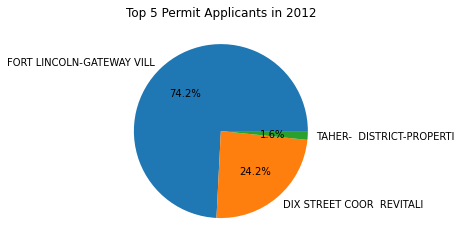

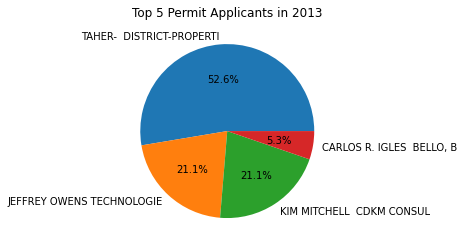

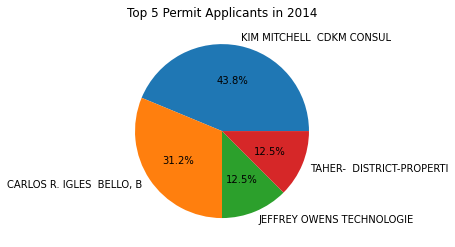

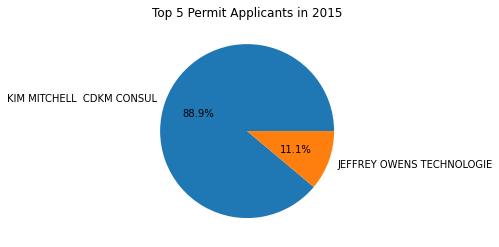

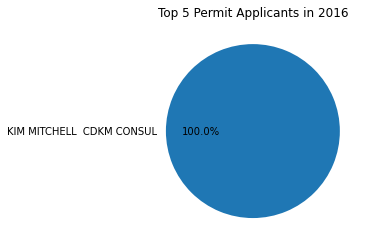

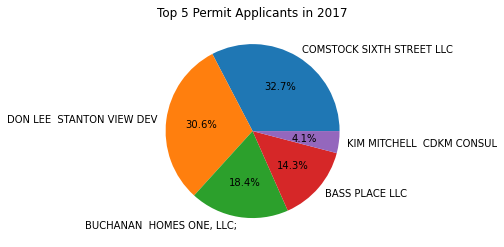

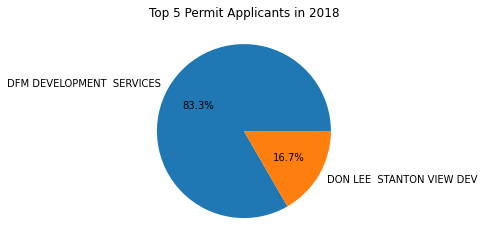

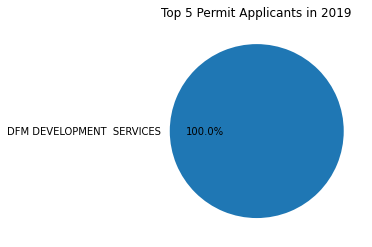

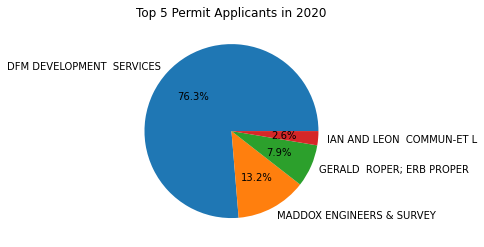

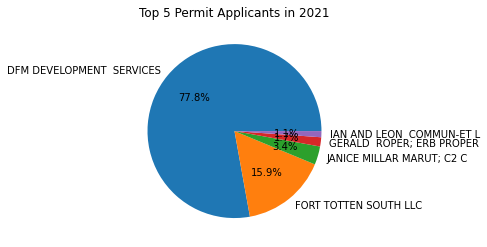

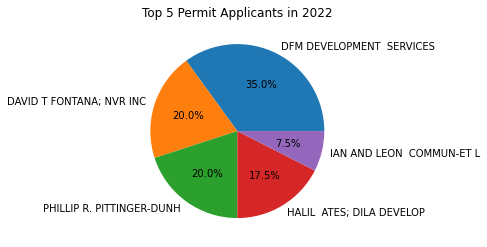

In [109]:
# group data by year and permit_applicant, count number of applications
df_grouped = big_builder_df.groupby(['year', 'PERMIT_APPLICANT']).size().reset_index(name='count')

# loop through each year, find top 5 permit_applicants, and plot pie chart
for year in df_grouped['year'].unique():
    df_year = df_grouped[df_grouped['year'] == year]
    df_top5 = df_year.nlargest(5, 'count')
    fig, ax = plt.subplots()
    ax.pie(df_top5['count'], labels=df_top5['PERMIT_APPLICANT'], autopct='%1.1f%%')
    ax.set_title(f'Top 5 Permit Applicants in {year}')
    plt.show()

##### "KIM MITCHELL CDKM CONSUL" takes whole year of bussines in 2016, let's track what the kind of business the company did from 2013 to 2017

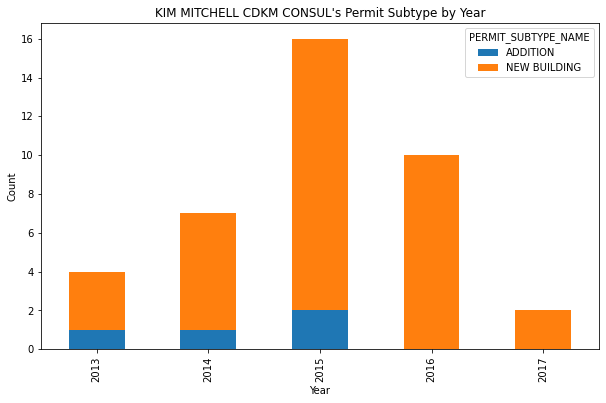

In [123]:
# filter data to only include rows where permit_applicant is "Applicant A" and year is between 2013 and 2017
df_filtered = big_builder_df.loc[(big_builder_df['PERMIT_APPLICANT'] == 'KIM MITCHELL  CDKM CONSUL') & (big_builder_df['year'] >= 2013) & (big_builder_df['year'] <= 2017)]
# df_filtered
# group data by year and permit_subtype and count the number of occurrences
df_grouped = df_filtered.groupby(['year', 'PERMIT_SUBTYPE_NAME']).size().reset_index(name='count')

# pivot the data to create a stacked bar graph
df_pivot = df_grouped.pivot(index='year', columns='PERMIT_SUBTYPE_NAME', values='count')

# plot the stacked bar graph
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the chart title and axis labels
ax.set_title("KIM MITCHELL CDKM CONSUL's Permit Subtype by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

# show the plot
plt.show()

## Find the KIM MITCHELL CDKM CONSUL's construction ward by year

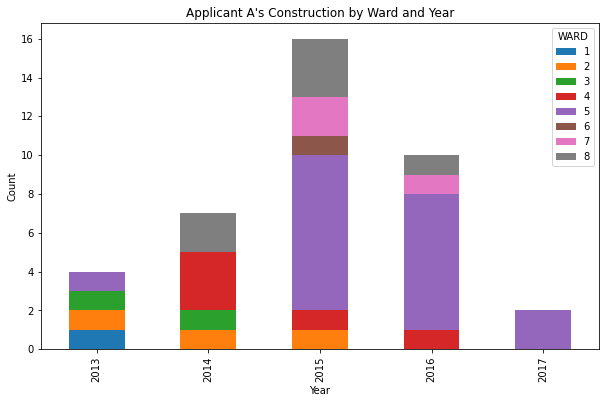

In [131]:

# filter data to only include rows where permit_applicant is "Applicant A"
df_f = big_builder_df.loc[(big_builder_df['PERMIT_APPLICANT'] == 'KIM MITCHELL  CDKM CONSUL')]

# group data by year, ward, and permit_subtype and count the number of occurrences
df_grouped = df_f.groupby(['year', 'WARD', 'PERMIT_APPLICANT']).size().reset_index(name='count')

# pivot the data to create a stacked bar graph
df_pivot = df_grouped.pivot(index='year', columns='WARD', values='count')

# plot the stacked bar graph
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the chart title and axis labels
ax.set_title("KIM MITCHELL  CDKM CONSUL's Construction by Ward and Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

# show the plot
plt.show()
